### Как правило, при импорте временных рядов, дата отображается как текст и обозначается в качестве типа данных - "Объект". Этот тип необходимо заменить на другой тип - datetime.

# Покажем это на примере

In [1]:
import pandas as pd
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv('Data/AirPassengers.csv')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## Проверим тип данных в колонке Month

In [3]:
type(df.Month[0])

str

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


#### Оказалось, что тип данных по умолчанию - это текст, а не дата. 

## Поменяем тип данных в колонке Month на дату (parse_dates=)

In [5]:
df = pd.read_csv('Data/AirPassengers.csv', parse_dates=['Month'])
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [6]:
type(df.Month[0])

pandas._libs.tslibs.timestamps.Timestamp

#### Тип данных изменился

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


## Обозначим, что иднексом является колонка Month (index_col=)

In [8]:
df = pd.read_csv('Data/AirPassengers.csv', parse_dates=['Month'], index_col='Month')
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [9]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

#### Выражение DatetimesIndex показывает, что индекс относится к типу data time

## Добавление колонки с нумерацией. Удобно для последующеего анализа

In [10]:
df['ID'] = range(0,len(df.index.values))
df.head()

,Passengers,ID
Month,,
1949-01-01,112,0
1949-02-01,118,1
1949-03-01,132,2
1949-04-01,129,3
1949-05-01,121,4


## Присвоение индекса позволяет делать отборы и сортировки

In [11]:
# Отбор данных за конкретный год
df['1959']

,Passengers,ID
Month,,
1959-01-01,360,120
1959-02-01,342,121
1959-03-01,406,122
1959-04-01,396,123
1959-05-01,420,124
1959-06-01,472,125
1959-07-01,548,126
1959-08-01,559,127
1959-09-01,463,128


In [12]:
# среднее число пассажиров за конкретный год
df['1959'].Passengers.mean()

428.3333333333333

In [13]:
# вывод заданного диапазона дат
df['1959-04-01':'1959-06-01']

,Passengers,ID
Month,,
1959-04-01,396,123
1959-05-01,420,124
1959-06-01,472,125


In [14]:
# вывод одной даты
df['1959-04-01':'1959-04-01']

,Passengers,ID
Month,,
1959-04-01,396,123


In [15]:
# вывод среднего числа пассажиров за квартал
df.Passengers.resample('Q').mean().head()

Month
1949-03-31    120.666667
1949-06-30    128.333333
1949-09-30    144.000000
1949-12-31    113.666667
1950-03-31    127.333333
Freq: Q-DEC, Name: Passengers, dtype: float64

In [16]:
# вывод среднего числа пассажиров за год
df.Passengers.resample('Y').mean().head()

Month
1949-12-31    126.666667
1950-12-31    139.666667
1951-12-31    170.166667
1952-12-31    197.000000
1953-12-31    225.000000
Freq: A-DEC, Name: Passengers, dtype: float64

<AxesSubplot:xlabel='Month'>

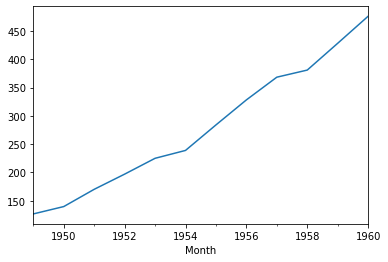

In [17]:
# вывод среднего числа пассажиров за год
df.Passengers.resample('Y').mean().plot()

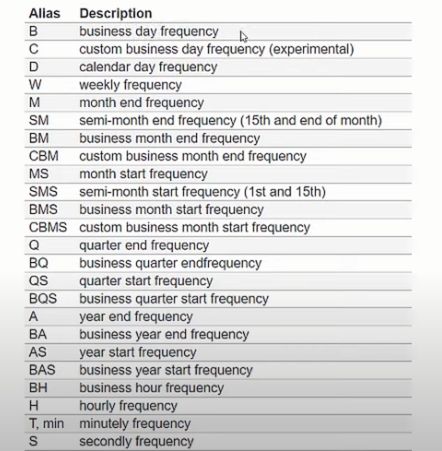

<AxesSubplot:xlabel='Month'>

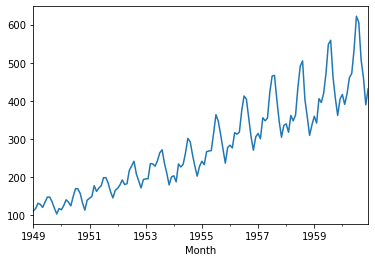

In [18]:
df.Passengers.resample('M').mean().plot()

<AxesSubplot:xlabel='Month'>

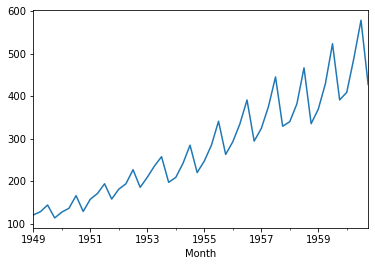

In [19]:
df.Passengers.resample('Q').mean().plot()

<AxesSubplot:xlabel='Month'>

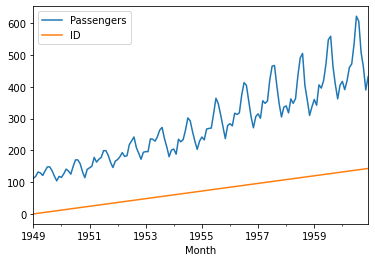

In [20]:
df.plot()

# Пример_2. Загрузим еще один набор данных
# Другой способ изменения типа данных с "Объект" на "Дату"

In [21]:
df3 = pd.read_csv('ALTSALES.csv', sep=',')
df3

,DATE,ALTSALES
0,1976-01-01,12.512
1,1976-02-01,13.044
2,1976-03-01,13.085
3,1976-04-01,12.915
4,1976-05-01,12.645
...,...,...
544,2021-05-01,16.890
545,2021-06-01,15.473
546,2021-07-01,14.681
547,2021-08-01,12.985


In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      549 non-null    object 
 1   ALTSALES  549 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.7+ KB


### Снова колонка Дата (DATE) интерпретируется как объект (object)

In [23]:
# Чтобы изменить тип данных на datetime можно использовать конструкцию pd.to_datetime
# Часть данных в столбце DATE могут оказаться битые, поэтому можно использовать errors, чтобы их проигнорировать.
df3['DATE'] = pd.to_datetime(df3['DATE'], errors='coerce') 

In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATE      549 non-null    datetime64[ns]
 1   ALTSALES  549 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.7 KB


In [25]:
type(df3.DATE[0])

pandas._libs.tslibs.timestamps.Timestamp

## Еще один способ поменять тип данных с "Объект" на "Дату"

In [26]:
df_2 = pd.read_csv('ALTSALES.csv', sep=',')
df_2

,DATE,ALTSALES
0,1976-01-01,12.512
1,1976-02-01,13.044
2,1976-03-01,13.085
3,1976-04-01,12.915
4,1976-05-01,12.645
...,...,...
544,2021-05-01,16.890
545,2021-06-01,15.473
546,2021-07-01,14.681
547,2021-08-01,12.985


In [27]:
df_2['DATE'] = pd.to_datetime(df_2['DATE'], format = '%Y-%m-%d')
indexed_df = df_2.set_index('DATE')
sales = indexed_df['ALTSALES']
sales

DATE
1976-01-01    12.512
1976-02-01    13.044
1976-03-01    13.085
1976-04-01    12.915
1976-05-01    12.645
               ...  
2021-05-01    16.890
2021-06-01    15.473
2021-07-01    14.681
2021-08-01    12.985
2021-09-01    12.158
Name: ALTSALES, Length: 549, dtype: float64

In [28]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATE      549 non-null    datetime64[ns]
 1   ALTSALES  549 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.7 KB


### Другие типы данных можно менять командой astype

In [29]:
# Изменим типа данных в колонке ALTSALES с float64 на object
df_2['ALTSALES'] = df_2['ALTSALES'].astype('object') 

In [30]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATE      549 non-null    datetime64[ns]
 1   ALTSALES  549 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 8.7+ KB


In [31]:
# вернем тип данных в колонке ALTSALES на исходный
df_2['ALTSALES'] = df_2['ALTSALES'].astype('float64') 

In [32]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATE      549 non-null    datetime64[ns]
 1   ALTSALES  549 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.7 KB


## Ссылки на источники для более глубокого изучения темы

#### https://github.com/mGalarnyk/Python_Tutorials/blob/master/Time_Series/Part1_Time_Series_Data_BasicPlotting.ipynb

#### видео https://www.youtube.com/watch?v=OwnaUVt6VVE&t=296s
https://www.youtube.com/watch?v=OwnaUVt6VVE